## Including necessary libraries

In [2]:
import pandas as pd   # It help in reading of the data and management of data
import numpy as np    # It is for mathematical computation
import matplotlib.pyplot as plt    # It is used for Plotting of data
import seaborn as sns

In [3]:
data = pd.read_csv("iris.csv")    # To read a csv file

## EDA

In [4]:
# Rows and columns
data.shape

(150, 5)

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
data.dtypes   # It shows the data types present in the whole data

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
data.count() # The no. of rows present in that file

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [9]:
# To know the column names
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
# This method prints information about a DataFrame 
# including the index dtype and columns, 
# non-null values and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Count number of values in species columns
data["species"].count()

150

In [12]:
# Print values in species column along with their Count number 
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
# desc= data.describe()
# print(desc)

In [14]:
desc = data["species"].describe()
desc

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [18]:
# desc = data["sepal_length"].describe()
# desc

## Finding null values in the data

In [19]:
# Find null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
# Drop null values
data.dropna()
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [21]:
#To find any null value present
data.isnull().sum()    

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Finding duplicate values in the data

In [22]:
# Find duplicates in the data
dp = data.duplicated()

print(dp.sum())

data[dp]

3


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [23]:
# Dropping the duplicates

# data = data.drop_duplicates()
# data.count()
# or
data.drop_duplicates(inplace=True)
data.count()

sepal_length    147
sepal_width     147
petal_length    147
petal_width     147
species         147
dtype: int64

In [26]:
dp = data.duplicated()

print(dp.sum())


0


## Data coorelation

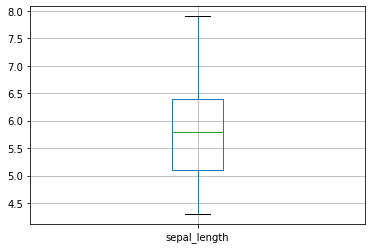

In [27]:
# Boxplot is used to find range in which the data lies
data.boxplot(column=["sepal_length"])
plt.show()

<AxesSubplot:xlabel='sepal_length'>

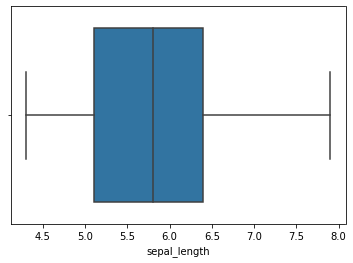

In [28]:
# 2nd way of boxplot
sns.boxplot(x=data["sepal_length"])

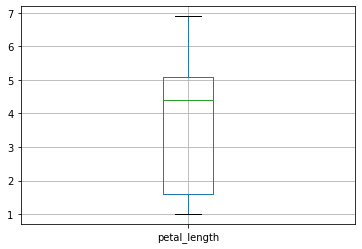

In [29]:
data.boxplot(column=["petal_length"])
plt.show()

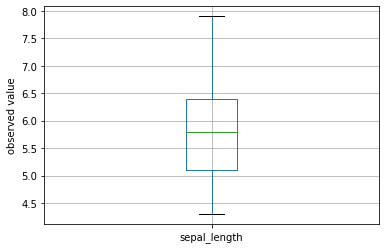

In [30]:
data.boxplot(column=["sepal_length"]) 
plt.ylabel('observed value')
plt.show()

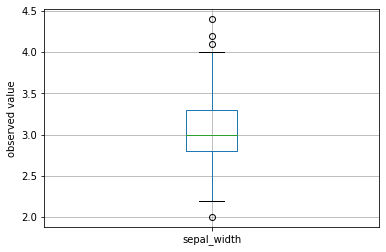

In [31]:
data.boxplot(column=["sepal_width"]) 
plt.ylabel('observed value')  
plt.show()

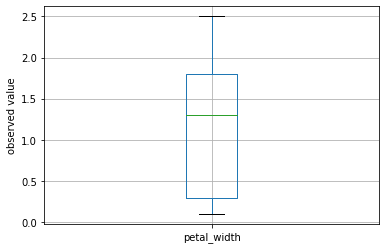

In [32]:
data.boxplot(column=["petal_width"]) 
plt.ylabel('observed value')  
plt.show()

In [33]:
# Print values in species column along with their Count number 
data["species"].value_counts()

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64

Multiple boxplot in one

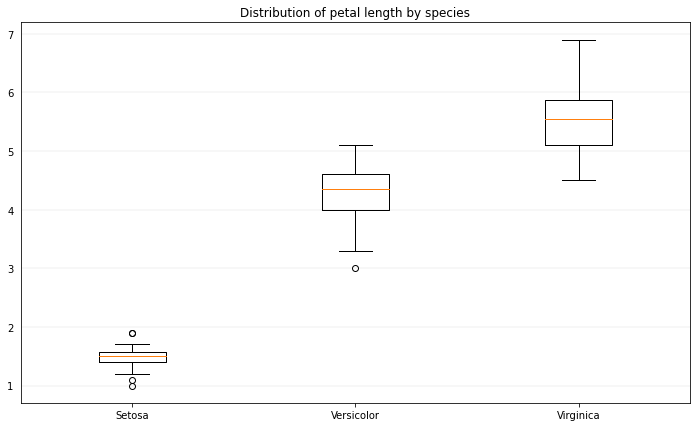

In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()

# Preparing Iris dataset
iris_data = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_target = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([iris_data, iris_target], axis=1)

# Add species name
iris_df['species_name'] = np.where(iris_df['species'] == 0, 'Setosa', None)
iris_df['species_name'] = np.where(iris_df['species'] == 1, 'Versicolor', iris_df['species_name'])
iris_df['species_name'] = np.where(iris_df['species'] == 2, 'Virginica', iris_df['species_name'])

# Prepare petal length by species datasets
setosa_petal_length = iris_df[iris_df['species_name'] == 'Setosa']['petal_length']
versicolor_petal_length = iris_df[iris_df['species_name'] == 'Versicolor']['petal_length']
virginica_petal_length = iris_df[iris_df['species_name'] == 'Virginica']['petal_length']

# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of petal length by species')

# Set species names as labels for the boxplot
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]
labels = iris_df['species_name'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

Removing the outliers in sepal_width

In [35]:
def remove_outlier(col):  #To remove unecessary space that is not to be used
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [36]:
lowage,upage=remove_outlier(data['sepal_width'])
data['sepal_width'] = np.where(data['sepal_width']>upage, upage, data['sepal_width'])
data['sepal_width'] = np.where(data['sepal_width']<lowage, lowage, data['sepal_width'])

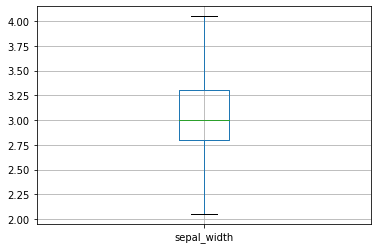

In [37]:
data.boxplot(column=["sepal_width"])
plt.show()

# 1D Scatter plot

In [38]:
#Load Dataset
iris = pd.read_csv("iris.csv")

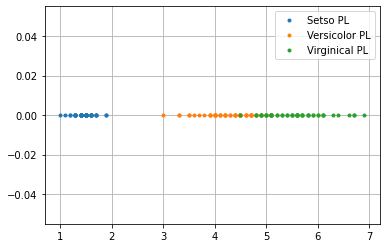

In [45]:
iris_setso = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setso["petal_length"],np.zeros_like(iris_setso["petal_length"]), '.', label="Setso PL")
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), '.', label="Versicolor PL")
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), '.' , label="Virginical PL")

plt.legend()
plt.grid()
plt.show()

# lengh =iris_setso["petal_length"]
# lengh

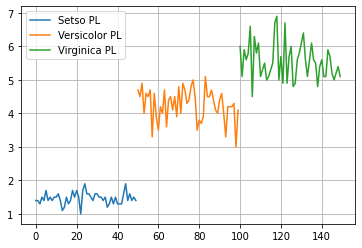

In [43]:
iris_setso = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setso["petal_length"], label="Setso PL")
plt.plot(iris_versicolor["petal_length"], label="Versicolor PL")
plt.plot(iris_virginica["petal_length"], label="Virginica PL")

plt.legend()
plt.grid()
plt.show()

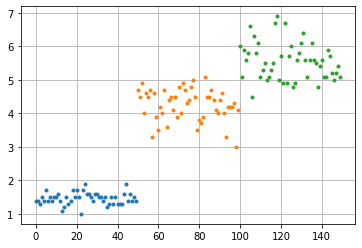

In [41]:
iris_setso = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setso["petal_length"], '.')
plt.plot(iris_versicolor["petal_length"], '.')
plt.plot(iris_virginica["petal_length"], '.')

plt.grid()
plt.show()

Scattet plot using two methods:

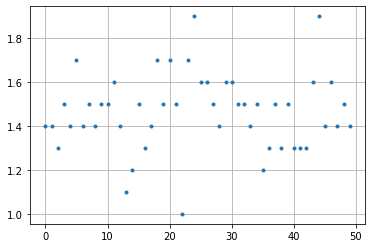

In [46]:
# First method to scatter plot
plt.plot(iris_setso["petal_length"], '.')

plt.grid()
plt.show()

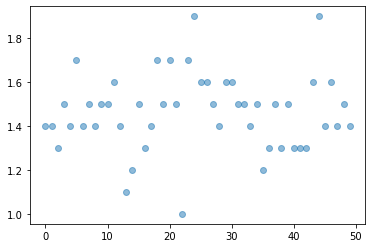

In [49]:
# Second method to scatter plot

y = iris_setso["petal_length"]
x = iris_setso.index

plt.scatter(x, y,  alpha=0.5)
plt.show()

In [50]:
data.corr() #To find the correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.110155,0.871305,0.817058
sepal_width,-0.110155,1.000000,-0.420140,-0.355139
petal_length,0.871305,-0.420140,1.000000,0.961883
petal_width,0.817058,-0.355139,0.961883,1.000000


Extra

{'whiskers': [<matplotlib.lines.Line2D at 0x134d967c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1332ec490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1332a9e80>,
 'medians': [<matplotlib.lines.Line2D at 0x1339a3b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1339a3430>,
 'means': []}

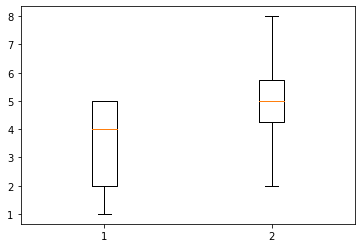

In [57]:
# Multiple boxplots

# my_dict = {'ABC': [34.54, 34.345, 34.761], 'DEF': [34.541, 34.748, 34.482]}

list1=[1,2,4,5,5]
list2=[8,5,5,2]
list=[list1, list2]
fig, ax = plt.subplots()
ax.boxplot(list)

# ax.boxplot(my_dict.values())
# ax.set_xticklabels(my_dict.keys())